
# Lab: Decision trees, part 2
In this lab we will look at how classification trees are built.  Look at hints only if you get stuck.



1. We defined the Gini index value for a node in a classification tree as
$2*p (1 - p)$
Where p is the estimated probability of either of the two classes.  For example, if a node 
has 30 training instances of class A, and 50 training instances of class B, then the 
estimated probability of class A is 30/(30 + 50).  What is the Gini index value for this 
node?


$(2*(30/80)) (1-(30/80)) = (2 * 0.375) * ( 1-0.375) =0.46875$

2. Create a new Python file.  Fill in the code below to create a function that gives the Gini 
value for a node in a binary classification tree given values for the number of instances 
of each class.  class_counts is a list of length two.   


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
def gini(class_counts):
    """ return the Gini value for a node in a binary classif. tree """
    total = class_counts[0] + class_counts[1]
    return (2 * class_counts[0]/total) * (1 - (class_counts[0]/total)) 

3. Test your function.  What is gini([30, 50])? gini([10, 10])?  What is gini([20, 0])?  What is 
gini([100, 0])? 


In [6]:
print('gini [30,50] = {:.2f}'.format(gini([30, 50])))
print('gini [10,10] = {:.2f}'.format(gini([10, 10])))
print('gini [20,0] = {:.2f}'.format(gini([20, 0])))
print('gini [100,0] = {:.2f}'.format(gini([100, 0])))

gini [30,50] = 0.47
gini [10,10] = 0.50
gini [20,0] = 0.00
gini [100,0] = 0.00


4. Add the following code at the top of your file to read and preprocess the data.



<AxesSubplot: xlabel='age', ylabel='maxhr'>

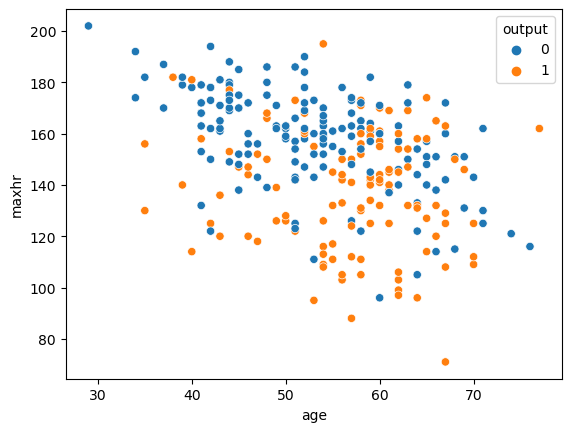

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/heart.csv")
df['output'] = df['output'] - 1
df = df[['age', 'maxhr', 'restbp', 'output']]
sns.scatterplot(x='age', y='maxhr', hue='output', data=df)

5. Run the code and look at the plot.  If we were going to build a classification tree, and 
split first on 'age', what do you think a good age value to split on would be?


Maybe 55

6. Compute the Gini index for df as a whole.  For this you just need the number of rows 
with output = 0 and the number of rows with output = 1.


In [16]:
gini([df['output'].value_counts()[0], df['output'].value_counts()[1]]).round(2)

0.49

7. Now consider a split on age < 50.  Write code to compute the Gini index for the case of 
of age < 50 and the Gini index for the case of age >= 50.  For the case of age < 50, get 
the rows of df where age < 50, then count the number of rows with output = 0 and output 
= 1.  


In [40]:
lt50_0, lt50_1 = (df[df['age'] < 50]['output']).value_counts()
gte50_0, gte50_1 = (df[df['age'] >= 50]['output']).value_counts()


8. Now compute the overall Gini index value for the split on age < 50.  First you need to 
compute the fraction of nodes associated with age < 50 (call it fraction_lo) and the 
fraction of nodes associated with age >= 50 (call it fraction_hi).  Then get the Gini value 
for the split like this (in pseudo code):
gini_split = gini_lo * fraction_lo + gini_hi * fraction_hi
The split is useful if the Gini value for the split is lower than the GIni value for the root.


In [45]:
print('Less than 50 gini: {:.2f}'.format(gini([lt50_0, lt50_1])))
print('50 and older gini: {:.2f}'.format(gini([gte50_0,gte50_1])))


Less than 50 gini: 0.41
50 and older gini: 0.50


9. Is a split on age < 40 better than a split on age < 50?


In [52]:
def splits(age, df):
    lt_0, lt_1 = (df[df['age'] < age]['output']).value_counts()
    gte_0, gte_1 = (df[df['age'] >= age]['output']).value_counts()

    print('Less than {} gini: {:.2f}'.format(age, gini([lt_0, lt_1])))
    print('{} and older gini: {:.2f}'.format(age,gini([gte_0,gte_1])))

In [48]:
splits(40, df)

Less than 40 gini: 0.44
40 and older gini: 0.49


it's not really better but its close. less than 40 is worse but >=40 is better

10. Compute the Gini value for all age splits where age ranges from 20 to 80.  Then plot the 
Gini split value for all the ages (age on x axis, Gini value on y axis).  What is the best 
age value for a split on age?


There are no data points bellow 20 or above 80 so I think if we split there we would get:
bellow 20 would be 1 and above 20 would be 0.46875
bellow 80 would be 0.46875 and above 80 would be 1


11. If you still have time, do the same thing for features 'maxhr' and 'restbp'.  What is the 
best feature and best split?


In [64]:
def hr_split(hr, df):
    lt_0, lt_1 = (df[df['maxhr'] < hr]['output']).value_counts()
    gte_0, gte_1 = (df[df['maxhr'] >= hr]['output']).value_counts()

    print('Less than {} gini: {:.2f}'.format(hr, gini([lt_0, lt_1])))
    print('{} and above gini: {:.2f}'.format(hr,gini([gte_0,gte_1])))

In [65]:
hr_split(130, df)

Less than 130 gini: 0.38
130 and above gini: 0.46
